# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import OWapi_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = url + "appid=" + OWapi_key + "&q=" 

In [5]:
city_dict = []
city_name = []
cloud = []
country = []
date = []
humid = []
lat = []
lng = []
maxtemp = []
windspeed = []

counter = 1
set = 1
print('''Beginning Data Retrieval
       ---------------------------''')

for city in cities:
    
    print(f"Processing Record {counter} of Set {set} | {city}")
    
    counter = counter + 1
    
    response = requests.get(query_url + city)
    data = response.json()
    
    if(response.status_code == 200):
        
        city_name.append(data["name"])
        cloud.append(data["clouds"]["all"])
        country.append(data["sys"]["country"])
        date.append(data["dt"])
        humid.append(data["main"]["humidity"])
        lat.append(data["coord"]["lat"])
        lng.append(data["coord"]["lon"])
        maxtemp.append(data["main"]["temp_max"])
        windspeed.append(data["wind"]["speed"])
        
        city_dict = {"City": city_name,
                    "Cloudiness": cloud,
                    "Country": country,
                    "Date": date,
                    "Humidity": humid,
                    "Lat": lat,
                    "Lng": lng,
                    "Max Temp": maxtemp,
                    "Wind Speed": windspeed}
       
    else:
        print(f"City:{city} not found... Skipping...")
        set = set + 1
    time.sleep(.001)
   

print('''--------------------------
         Data Retrieval is Complete
         --------------------------''')

Beginning Data Retrieval
       ---------------------------
Processing Record 1 of Set 1 | taolanaro
City:taolanaro not found... Skipping...
Processing Record 2 of Set 2 | luang prabang
Processing Record 3 of Set 2 | lompoc
Processing Record 4 of Set 2 | kamaishi
Processing Record 5 of Set 2 | qaanaaq
Processing Record 6 of Set 2 | sao filipe
Processing Record 7 of Set 2 | busselton
Processing Record 8 of Set 2 | lerwick
Processing Record 9 of Set 2 | rikitea
Processing Record 10 of Set 2 | albany
Processing Record 11 of Set 2 | deputatskiy
Processing Record 12 of Set 2 | hermanus
Processing Record 13 of Set 2 | hudiksvall
Processing Record 14 of Set 2 | ilulissat
Processing Record 15 of Set 2 | vaini
Processing Record 16 of Set 2 | caravelas
Processing Record 17 of Set 2 | barentsburg
City:barentsburg not found... Skipping...
Processing Record 18 of Set 3 | new norfolk
Processing Record 19 of Set 3 | flinders
Processing Record 20 of Set 3 | barrow
Processing Record 21 of Set 3 | hamil

In [6]:
city_weather = pd.DataFrame(city_dict)
city_weather.to_csv('cityweather.csv', index=False)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_weather.count()

City          536
Cloudiness    536
Country       536
Date          536
Humidity      536
Lat           536
Lng           536
Max Temp      536
Wind Speed    536
dtype: int64

In [8]:
city_weather.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Luang Prabang,0,LA,1576121427,72,19.89,102.14,288.15,1.00
1,Lompoc,75,US,1576121363,93,34.64,-120.46,288.15,3.10
2,Kamaishi,75,JP,1576121427,86,39.28,141.86,276.15,4.10
3,Qaanaaq,0,GL,1576121428,50,77.48,-69.36,253.53,4.39
4,Sao Filipe,95,CV,1576121428,63,14.90,-24.50,296.64,7.64


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

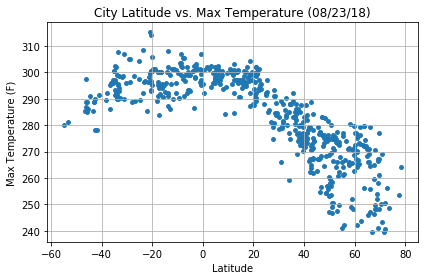

In [10]:
cityVSmaxtemp = plt.scatter(city_weather["Lat"], city_weather["Max Temp"], marker="o", s=15)

plt.title("City Latitude vs. Max Temperature (08/23/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.tight_layout()
plt.savefig("cityVSmaxtemp.png")
plt.show()

#### Latitude vs. Humidity Plot

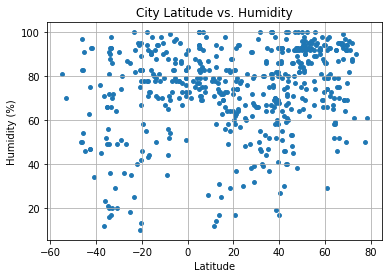

In [11]:
plt.scatter(city_weather["Lat"], city_weather["Humidity"], marker="o", s=15)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("CityVSHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

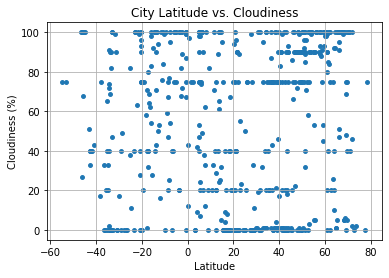

In [12]:
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], marker="o", s=15)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("CityVSCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

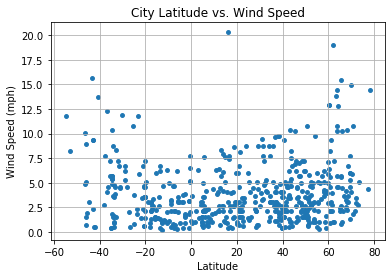

In [13]:
plt.scatter(city_weather["Lat"], city_weather["Wind Speed"], marker="o", s=15)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("CityVSWindspeed.png")
plt.show()